In [33]:
import os
from deepface import DeepFace
from deepface.commons import functions
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
facial_img_paths = []
for root, directory, files in os.walk("deepface/tests/dataset"):
    for file in files:
        if '.jpg' in file:
            facial_img_paths.append(root+"/"+file)

In [4]:
model = DeepFace.build_model("Facenet")

In [5]:
instances = []

#for facial_img_path in facial_img_paths:
for i in tqdm(range(0, len(facial_img_paths))):
    facial_img_path = facial_img_paths[i]
    facial_img = functions.preprocess_face(facial_img_path, target_size = (160, 160))
    
    embedding = model.predict(facial_img)[0]
    
    instance = []
    instance.append(facial_img_path)
    instance.append(embedding)
    instances.append(instance)

100%|██████████| 60/60 [00:33<00:00,  1.80it/s]


In [6]:
df = pd.DataFrame(instances, columns = ["img_name", "embedding"])

In [7]:
df.head()

,img_name,embedding
0,deepface/tests/dataset/img1.jpg,"[1.0574055, 1.0961407, 1.2643185, -1.6389996, ..."
1,deepface/tests/dataset/img10.jpg,"[-0.32284275, 1.3187261, 1.242616, -1.4587235,..."
2,deepface/tests/dataset/img11.jpg,"[0.28591383, 0.35173756, 2.1035275, -1.4823748..."
3,deepface/tests/dataset/img12.jpg,"[-0.15722206, 2.2241635, -0.8684032, -1.483796..."
4,deepface/tests/dataset/img13.jpg,"[-1.2929415, -0.8253571, -1.7417858, -0.585865..."


# Mongo

In [8]:
from pymongo import MongoClient

In [9]:
connection = "mongodb+srv://..."

In [10]:
database = 'deepface'
collection = 'deepface'

In [11]:
client = MongoClient(connection)

In [12]:
db = client[database]

# Store embeddings in mongo

In [14]:
for index, instance in tqdm(df.iterrows(), total = df.shape[0]):
    db[collection].insert_one({"img_path": instance["img_name"], "embedding" : instance["embedding"].tolist()})

100%|██████████| 60/60 [00:09<00:00,  6.64it/s]


# Target

In [15]:
target_img_path = "target.jpg"

In [16]:
target_img = functions.preprocess_face(target_img_path, target_size = (160, 160))

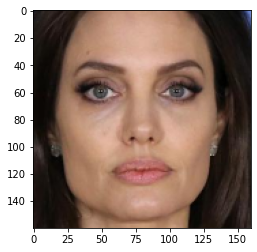

In [41]:
plt.imshow(target_img[0][:,:,::-1])
plt.show()

In [17]:
target_embedding = model.predict(target_img)[0].tolist()

In [ ]:
target_img.shape, target_embedding.shape

# Queries

In [18]:
db[collection].find_one({'img_path': 'deepface/tests/dataset/img1.jpg'})

{'_id': ObjectId('600b1eed023a302a7526a2a6'),
 'img_path': 'deepface/tests/dataset/img1.jpg',
 'embedding': [1.0574054718017578,
  1.096140742301941,
  1.2643184661865234,
  -1.638999581336975,
  0.7579548954963684,
  -0.12233594059944153,
  1.308609962463379,
  1.2749913930892944,
  1.7389332056045532,
  1.1146012544631958,
  -0.9937471747398376,
  0.3175753057003021,
  -1.1246838569641113,
  -0.42779073119163513,
  -1.678671956062317,
  0.5315002799034119,
  -1.686165452003479,
  -0.12677600979804993,
  1.3189998865127563,
  -0.48210257291793823,
  1.2653145790100098,
  -0.2059461921453476,
  -0.5703672170639038,
  -1.231877326965332,
  -2.3868844509124756,
  2.332141399383545,
  -0.5828057527542114,
  -1.0667916536331177,
  -0.9217953681945801,
  0.8903037309646606,
  -0.5253409147262573,
  1.1014033555984497,
  0.8570927381515503,
  -1.8204987049102783,
  0.48771920800209045,
  -0.5778278112411499,
  -1.0221291780471802,
  0.8585324883460999,
  1.511669635772705,
  0.19403512775897

In [19]:
db[collection].find_one({'embedding': df.iloc[0].embedding.tolist()})

{'_id': ObjectId('600b1eed023a302a7526a2a6'),
 'img_path': 'deepface/tests/dataset/img1.jpg',
 'embedding': [1.0574054718017578,
  1.096140742301941,
  1.2643184661865234,
  -1.638999581336975,
  0.7579548954963684,
  -0.12233594059944153,
  1.308609962463379,
  1.2749913930892944,
  1.7389332056045532,
  1.1146012544631958,
  -0.9937471747398376,
  0.3175753057003021,
  -1.1246838569641113,
  -0.42779073119163513,
  -1.678671956062317,
  0.5315002799034119,
  -1.686165452003479,
  -0.12677600979804993,
  1.3189998865127563,
  -0.48210257291793823,
  1.2653145790100098,
  -0.2059461921453476,
  -0.5703672170639038,
  -1.231877326965332,
  -2.3868844509124756,
  2.332141399383545,
  -0.5828057527542114,
  -1.0667916536331177,
  -0.9217953681945801,
  0.8903037309646606,
  -0.5253409147262573,
  1.1014033555984497,
  0.8570927381515503,
  -1.8204987049102783,
  0.48771920800209045,
  -0.5778278112411499,
  -1.0221291780471802,
  0.8585324883460999,
  1.511669635772705,
  0.19403512775897

In [26]:
documents = db[collection].find()

for document in documents:
    print(document["img_path"], document["embedding"][0:3], "...")

deepface/tests/dataset/img1.jpg [1.0574054718017578, 1.096140742301941, 1.2643184661865234] ...
deepface/tests/dataset/img10.jpg [-0.3228427469730377, 1.3187260627746582, 1.242616057395935] ...
deepface/tests/dataset/img11.jpg [0.2859138250350952, 0.3517375588417053, 2.103527545928955] ...
deepface/tests/dataset/img12.jpg [-0.15722206234931946, 2.22416353225708, -0.8684031963348389] ...
deepface/tests/dataset/img13.jpg [-1.2929414510726929, -0.8253570795059204, -1.7417857646942139] ...
deepface/tests/dataset/img14.jpg [-1.323629379272461, -0.89812171459198, -1.9165891408920288] ...
deepface/tests/dataset/img15.jpg [-0.9417965412139893, -0.7104374170303345, -1.7694668769836426] ...
deepface/tests/dataset/img16.jpg [-0.4298444092273712, -0.2000650018453598, -1.5042515993118286] ...
deepface/tests/dataset/img17.jpg [-0.5163904428482056, -0.4824235439300537, -1.5124670267105103] ...
deepface/tests/dataset/img18.jpg [0.6397972106933594, 1.7559257745742798, -1.4044530391693115] ...
deepface/

# Mongo side solution

{'_id': 'deepface/tests/dataset/img2.jpg', 'distance': 7.0178008611285865, 'cond': True}


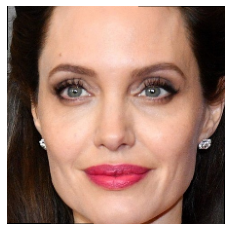

--------------------
{'_id': 'deepface/tests/dataset/img10.jpg', 'distance': 7.629044595250684, 'cond': True}


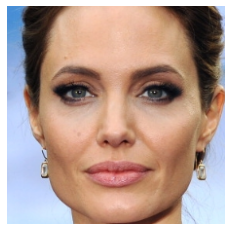

--------------------
{'_id': 'deepface/tests/dataset/img6.jpg', 'distance': 8.467856464704305, 'cond': True}


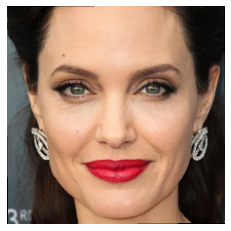

--------------------
{'_id': 'deepface/tests/dataset/img4.jpg', 'distance': 8.58306099238241, 'cond': True}


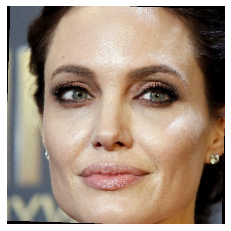

--------------------
{'_id': 'deepface/tests/dataset/img7.jpg', 'distance': 8.762336403333999, 'cond': True}


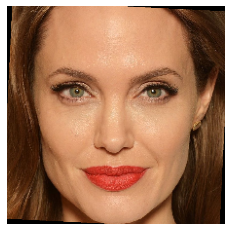

--------------------
{'_id': 'deepface/tests/dataset/img11.jpg', 'distance': 8.944895856870483, 'cond': True}


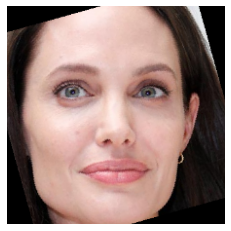

--------------------
{'_id': 'deepface/tests/dataset/img1.jpg', 'distance': 9.297199074856135, 'cond': True}


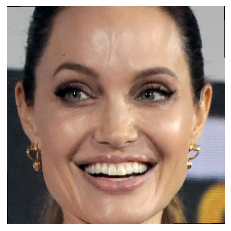

--------------------


In [40]:
query = db[collection].aggregate( [
    {
        "$addFields": { 
            "target_embedding": target_embedding
        }
    }
    , {"$unwind" : { "path" : "$embedding", "includeArrayIndex": "embedding_index"}}
    , {"$unwind" : { "path" : "$target_embedding", "includeArrayIndex": "target_index" }}
    
    , {
        "$project": {
            "img_path": 1,
            "embedding": 1,
            "target_embedding": 1,
            "compare": {
                "$cmp": ['$embedding_index', '$target_index']
            }
        }
    }
    , {"$match": {"compare": 0}}
    
    , {
      "$group": {
        "_id": "$img_path",
        "distance": {
                "$sum": {
                    "$pow": [{
                        "$subtract": ['$embedding', '$target_embedding']
                    }, 2]
                }
        }
      }
    }
    , { 
        "$project": {
            "_id": 1
            #, "distance": 1
            , "distance": {"$sqrt": "$distance"}
        }
    }
    , { 
        "$project": {
            "_id": 1
            , "distance": 1
            , "cond": { "$lte": [ "$distance", 10 ] }
        }
    }
    , {"$match": {"cond": True}}
    , { "$sort" : { "distance" : 1 } }
    , { "$limit" : 10 }
] )

for i in query:
    print(i)
    
    img_path = i["_id"]
    img = functions.preprocess_face(img_path)[0]
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.show()
    #print(i["distance"])
    
    print("--------------------")